In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset (assuming you've downloaded it to your working directory)
# A common dataset for this task is 'advertising.csv'
df = pd.read_csv('advertising.csv')

# Display the first few rows
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


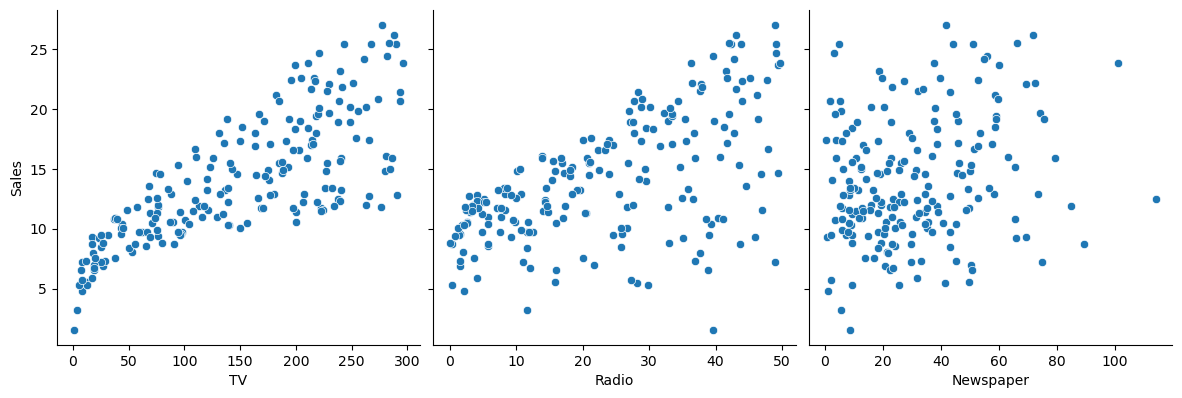

In [2]:
# Check for missing data and inspect data types
print(df.info())

# Visualize the relationship between each advertising channel and sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [3]:
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [5]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
r2_score = metrics.r2_score(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)

print(f"R-squared (R²): {r2_score:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Analyze the impact of each advertising channel by looking at the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nAdvertising Impact (Coefficients):")
print(coefficients)

R-squared (R²): 0.90
Mean Absolute Error (MAE): 1.46

Advertising Impact (Coefficients):
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761
